## O PROBLEMA DE NEGÓCIO

**A Empresa Insurance All**

A Insurance All é uma empresa que fornece seguro de saúde para seus clientes e o time de produtos está analisando a possibilidade de oferecer aos assegurados, **um novo produto: Um seguro de automóveis.**

Assim como o seguro de saúde, os clientes desse novo plano de seguro de automóveis precisam pagar um valor anualmente à Insurance All para obter um valor assegurado pela empresa, destinado aos custos de um eventual acidente ou dano ao veículo.

A Insurance All fez uma **pesquisa** com cerca de **380 mil clientes** sobre o interesse em aderir a um novo produto de seguro de automóveis, no ano passado. Todos os clientes demonstraram interesse ou não em adquirir o seguro de automóvel e essas respostas ficaram salvas em um banco de dados junto com outros atributos dos clientes.

O time de produtos selecionou **127 mil novos clientes que não responderam a pesquisa** para participar de uma campanha, no qual receberão a oferta do novo produto de seguro de automóveis. A oferta será feita pelo time de vendas através de ligações telefônicas.
Contudo, o time de vendas tem uma **capacidade de realizar 20 mil ligações** dentro do período da campanha.

**OBJETIVO:**

- Ordenar uma lista de clientes mais propensos a aceitar o novo produto, pela limitada capacidade de ligações.
- Sendo um problema de Rankeamento.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline 
# usar esse comando para não precisar dar plt.show em cada gráfico

## Carregando os dados

In [2]:
df_raw = pd.read_csv('data/train.csv')

## Análise descritiva

Utiliza-se a estatística descritiva onde aplica-se várias técnicas com a finalidade de descrever e resumir um conjunto de dados. 

Algumas medidas que são normalmente usadas para descrever um conjunto de dados são medidas de **tendência central e medidas de variabilidade ou dispersão**. Medidas de tendência central incluem média, mediana e moda. Medidas de variabilidade incluem desvio padrão, variância, o valor máximo e mínimo, obliquidade e curtose.

- Exibindo uma amostra de 5 linhas dos dados

In [3]:
df_raw.sample(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
342894,342895,Male,37,1,28.0,0,> 2 Years,Yes,40504.0,124.0,65,0
205521,205522,Female,38,1,46.0,0,1-2 Year,Yes,25660.0,154.0,108,0
322109,322110,Female,23,1,30.0,1,< 1 Year,No,37295.0,152.0,161,0
53968,53969,Female,25,1,28.0,1,< 1 Year,No,57936.0,152.0,26,0
200618,200619,Female,49,1,28.0,0,1-2 Year,Yes,54059.0,26.0,87,0


- Colocando os nomes das colunas em minusculo

In [4]:
colunas = df_raw.columns

new_cols = [i.lower() for i in colunas]

df_raw.columns = new_cols

**Descrição das colunas**

colunas | descrição
------ | -------
id | identificador único
gender | gênero do cliente
age | idade do cliente
driving license | 0: não permissão digirir, 1: permissão digirir
region code | código da região do cliente
Previously Insured | 0: não possui seguro automovel, 1: já possui seguro automovel
vehicle age | idade do veículo
vehicle damage | 0: nunca foi danificado, 1: já foi danificado no passado
anual premium | quantidade que irá pagar pelo seguro de automovel anual
policy sales channel | código anônimo do contato do cliente 
vintage | nº dias que o cliente associou à empresa
response | 0: não tem interesse ao seguro de automovel, 1: tem interesse ao seguro de automovel

- Dimensão dos dados

In [5]:
print(f'Total de linhas: {df_raw.shape[0]}')
print(f'Total de colunas: {df_raw.shape[1]}')

Total de linhas: 381109
Total de colunas: 12


- Verificando presença de valores ausentes nos dados

In [6]:
## Check NA
df_raw.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

- Verificando se há valores duplicados

In [7]:
## duplicate
df_raw[df_raw.duplicated()] # não há linhas duplicadas

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response


- Tipos de dados de cada coluna

In [8]:
df_raw.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

### **Análise estatística de variaveis numericas**

['age', 'region_code', 'annual_premium', 'policy_sales_channel', 'vintage']

- Tais atributos foram selecionados para obter estatística de tendência cetral e dispersão da distribuição dos dados.

    - TENDÊNCIA CENTRAL:
**média:** soma de um grupo de números e divide pela contagem desses números.

**mediana:** o número central de uma lista de dados organizados de forma crescente ou decrescente.
        
    -TENDÊNCIA DE DISPERSÃO:
**máximo:** o maior número no conjunto de dados.

**mínimo:** o menor número no conjunto de dados.

**amplitude:** é a diferença entre o maior e o menor valor observado. Sendo sensivel ao outliers.

**desvio padrão:** é dado pela raiz quadrada da variância. Uma medida de variabilidade dos dados.

**Assimetria:** é quando a distribuição não é simetria, ou seja, a média não é igual a mediana. Podendo ser positiva (enviesada a direita) ou negativa (enviesada a esquerda).

**Kurtosis:** É o grau de achatamento de uma distribuição, em relação a distribuição normal.
- valor = 0 -> igual uma distribuição normal
- valor > 0 -> a distribuição em questão é mais alta (afunilada) e concentrada que a distribuição normal
- valor < 0 -> distribuição é mais "achatada" que a distribuição normal.

In [9]:
## estatistic
# numeric
num_attributes = df_raw[['age', 'region_code', 'annual_premium', 'policy_sales_channel', 'vintage']]


# central tendency
# mean / median
c1 = pd.DataFrame(num_attributes.apply(np.mean)).T
c2 = pd.DataFrame(num_attributes.apply(np.median)).T

# dispersion tendency
#max / min / range / std / sknew / kurtosi
d1 = pd.DataFrame(num_attributes.apply(np.max)).T
d2 = pd.DataFrame(num_attributes.apply(np.min)).T
d3 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T
d6 = pd.DataFrame(num_attributes.apply(np.std)).T

# concat
df_num = pd.concat([c1,c2,d1,d2,d3,d4,d5, d6]).T.reset_index()
df_num.columns = ['attribute', 'mean', 'median', 'max', 'min', 'range', 'skew', 'kurtosis', 'std']
df_num

,attribute,mean,median,max,min,range,skew,kurtosis,std
0,age,38.822584,36.0,85.0,20.0,65.0,0.672539,-0.565655,15.511591
1,region_code,26.388807,28.0,52.0,0.0,52.0,-0.115266,-0.867857,13.229871
2,annual_premium,30564.389581,31669.0,540165.0,2630.0,537535.0,1.766087,34.004569,17213.132474
3,policy_sales_channel,112.034295,133.0,163.0,1.0,162.0,-0.900008,-0.970810,54.203924
4,vintage,154.347397,154.0,299.0,10.0,289.0,0.003030,-1.200688,83.671194


**NOTA**

AGE
- Distribuição enviesada a direita, assimetria um pouco maior que zero.
- Média maior que mediana.

ANNUAL_PREMIUM
- Distribuição enviesada a direita, assimetria maior que zero.
- Média menor que mediana.

VINTAGE
- A assimetria está quase zero, 0,003030. 

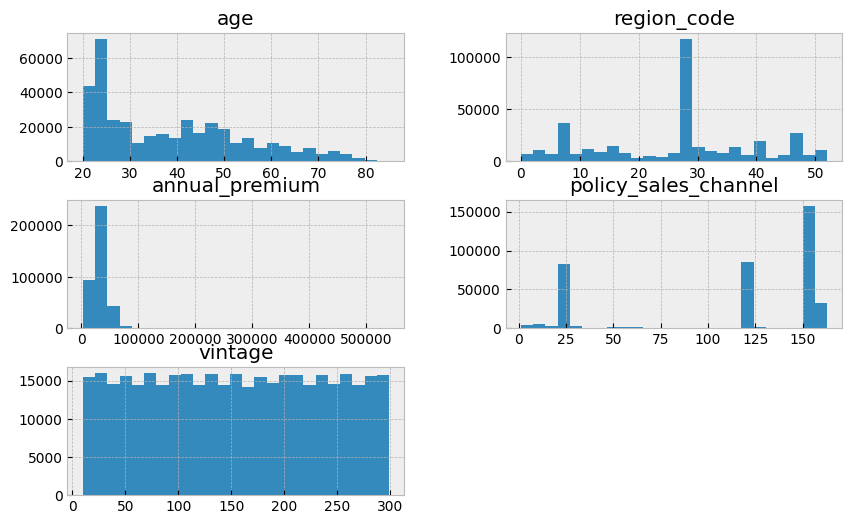

In [10]:
plt.rcParams['figure.figsize'] = [10, 6]
# plt.rcParams['font.size'] = 5
plt.style.use( 'bmh' )
num_attributes.hist(bins=25);

**Boxplot**

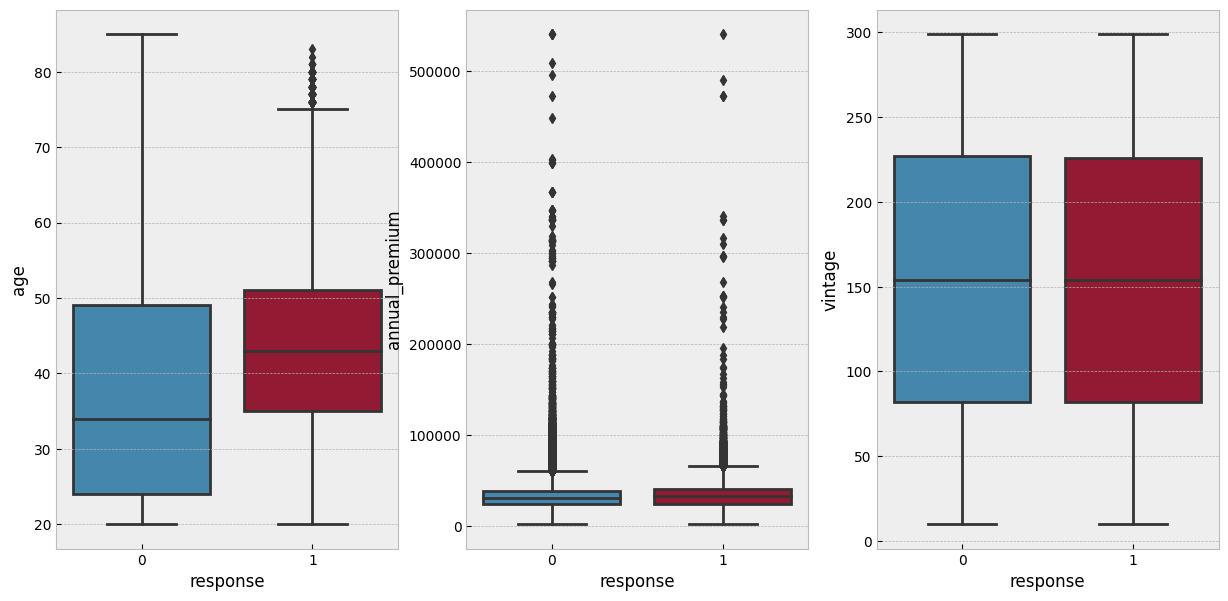

In [11]:
plt.figure(figsize=(15,7))

plt.subplot(1,3,1)
ax1 = sns.boxplot(y = df_raw['age'], x=df_raw['response'])

plt.subplot(1,3,2)
ax2 = sns.boxplot(y = df_raw['annual_premium'], x=df_raw['response'])

plt.subplot(1,3,3)
ax3 = sns.boxplot(y = df_raw['vintage'], x=df_raw['response']);

**NOTA:**

Idéia da posição, dispersão, assimetria, caudas e dados discrepantes do conjunto de dados. 

- O boxplot é composto por um retangulo onde estão representados os quartis e a mediana.
- Quartis:
    - q(0,25): 1º quartil ou 25º percentil.
    - q(0,50): 2º quartil ou mediana ou 5º decil ou 50º percentil.
    - q(0,75): 3º quartil ou 75º percentil.

- Abaixo e a acima do retangulo estão representados o limite inferior e superior, sendo calculados LS=Q3+1.5*(Q3 -Q1) e  LI= Q1-1.5*(Q3-Q1), respectivamente. 
- As observações que estiverem acima do limite superior ou abaixo do limite inferior estabelecidos, são representados por asteriscos ou pontos. Podendo ser considerados outliers ou valores atípicos. 

### **Análise de variaveis categóricas**

['gender', 'driving_license','previously_insured', 'vehicle_age', 'vehicle_damage', 'response']

In [12]:
# categorical
cat_attributes = df_raw[['gender', 'driving_license','previously_insured', 'vehicle_age', 'vehicle_damage', 'response']]
cat_attributes.apply(lambda x: x.unique().shape[0])

gender                2
driving_license       2
previously_insured    2
vehicle_age           3
vehicle_damage        2
response              2
dtype: int64

**Classes de cada variavel categorica no conjunto de dados.**

- Uma forma visual de verificar a distribuição dos dados nas variaveis categóricas é utilizando o gŕafico de barras e/ou boxplot.

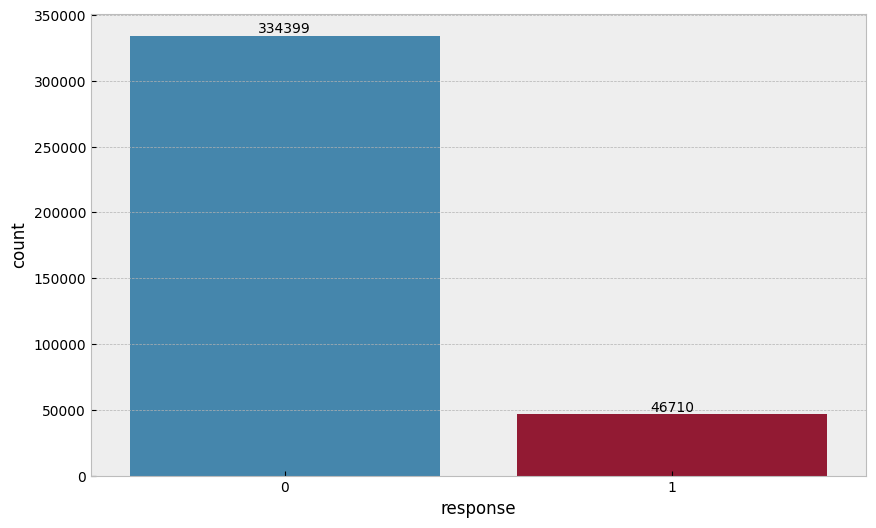

In [13]:
aux1 = df_raw[['id', 'response']].groupby('response').count().reset_index()
# contando os usuarios que responderam sim e não.

aux1 = aux1.rename(columns={'id': 'count'})
# renomeando a coluna

ax = sns.barplot(x= aux1['response'], y= aux1['count'])
ax.bar_label(ax.containers[0]);


In [14]:
print(cat_attributes['gender'].value_counts())

aux1 = df_raw[['id', 'response','gender']].groupby(['gender','response']).count().reset_index()
aux1

Male      206089
Female    175020
Name: gender, dtype: int64


,gender,response,id
0,Female,0,156835
1,Female,1,18185
2,Male,0,177564
3,Male,1,28525


In [15]:
print(cat_attributes['vehicle_age'].value_counts())

aux2 = df_raw[['id', 'response','vehicle_age']].groupby(['vehicle_age','response']).count().reset_index()
aux2

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: vehicle_age, dtype: int64


,vehicle_age,response,id
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


In [16]:
print(cat_attributes['vehicle_damage'].value_counts())

aux3 = df_raw[['id', 'response','vehicle_damage']].groupby(['vehicle_damage','response']).count().reset_index()
aux3

Yes    192413
No     188696
Name: vehicle_damage, dtype: int64


,vehicle_damage,response,id
0,No,0,187714
1,No,1,982
2,Yes,0,146685
3,Yes,1,45728


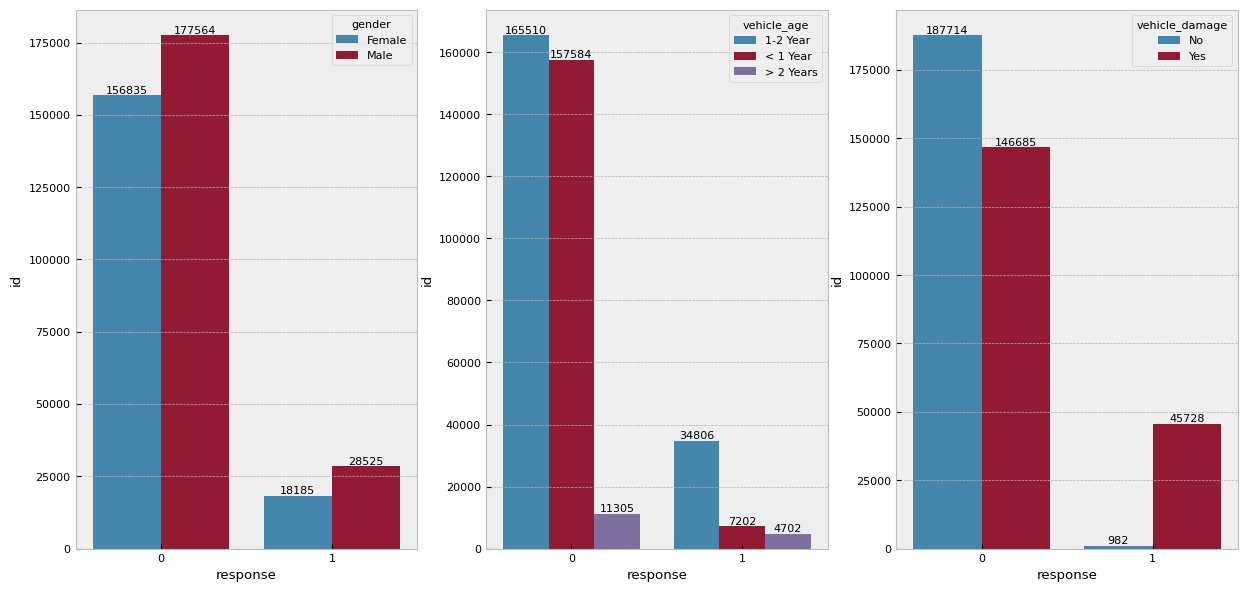

In [17]:
plt.figure(figsize=(15,7))
plt.rcParams['font.size'] = 8

plt.subplot(1,3,1)
ax = sns.barplot(data=aux1, x='response', y='id', hue='gender')
for container in ax.containers:
    ax.bar_label(container)

plt.subplot(1,3,2)
ax1 = sns.barplot(data=aux2, x='response', y='id', hue='vehicle_age')
for container in ax1.containers:
    ax1.bar_label(container)

plt.subplot(1,3,3)
ax2 = sns.barplot(data=aux3, x='response', y='id', hue='vehicle_damage')
for container in ax2.containers:
    ax2.bar_label(container);

**NOTA:**

- Como o conjuntos de dados é desbalanceados, foi realizado uma pequena análise de cada categória de acordo com a sua responta na pesquisa. 
- Tal análise tem como objetivo observar a distribuição dessas variaveis categóricas no conjunto de dados.

**REFERÊNCIAS:**

https://medium.com/@gisely.alves/visualiza%C3%A7%C3%A3o-de-dados-com-seaborn-2fd0defd9adb

https://cesad.ufs.br/ORBI/public/uploadCatalago/09215427022012Bioestatistica_Aula_03.pdf

https://ead.uepg.br/apl/sigma/assets/editais/PS0027E0035.pdf

https://pt.wikipedia.org/wiki/Estat%C3%ADstica_descritiva